# Experiment 1.3.1
This started as a copy of 1.3. Code from 1.3 is moved into a Python package and work continues from there. This was done as Jupyterlab doesn't make it easy to share or test code.

In [1]:
import cv2
import numpy as np
from enum import Enum
import colorsys
import moviepy.editor as mpe
import moviepy
from typing import *
import random
import pandas as pd
import json
import torch
from icecream import ic
import nncolor as nc
import nncolor.data

In [5]:
import IPython
def imshow(img):
    img = img*255
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [3]:
def demo_data():
    FPS = 2
    #frames = [circle_img(p, (255, 255, 255), (50, 20, 20)) for p in range(NUM_POSITIONS)]
    #labels = ['WB-0']*len(frames)
    frames, labels = nc.data.create_samples(30)
    frames = [f*255 for f in frames]
    x_clip = mpe.ImageSequenceClip(frames, fps=2)
    y_clip = mpe.TextClip('WB-0', font='DejaVu-Sans')

    class FrameText(mpe.VideoClip):
        def __init__(self, text, fps):
            def make_frame(f):
               return mpe.TextClip(text[int(f)], font='DejaVu-Sans', color='white').get_frame(f)
            self.duration = 1.0 * len(text) / fps
            mpe.VideoClip.__init__(self, make_frame=make_frame, duration=self.duration)

    y_clip =   FrameText(labels, FPS)
    label_clip = mpe.CompositeVideoClip([mpe.ImageClip(np.zeros((nc.data.IMG_SIZE, nc.data.IMG_SIZE, 3)), duration=5), y_clip])
    comp_clip = mpe.clips_array([[y_clip],[x_clip]])
    return comp_clip
clip = demo_data() 
clip.ipython_display()

t:  20%|██        | 6/30 [00:00<00:00, 56.59it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


ic| (pos, label, circle_rgb, bg_rgb): (8,
                                       'orange',
                                       [0.42899771346809457, 0.23439169944130017, 0.08302465666907313],
                                       [0.4107765687820619, 0.4107765687820619, 0.4107765687820619])


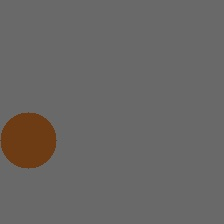

In [8]:
def test_dataset():
    train, test, val = nc.data.load_datasets()
    imshow(val[300]['image'])
test_dataset()